In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Lambda
from keras.layers.convolutional import Convolution2D, Cropping2D
import tensorflow as tf
import pickle
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import json




Using TensorFlow backend.


In [3]:
column_names = ['center', 'left', 'right', 'steering']
dataframe = pd.read_csv('./data/driving_log.csv')


In [4]:
# Import center images, resize and crop

center_images = []
center = dataframe.center.tolist()
for i in center:
    image = mpimg.imread('./data/' + i)
    image = cv2.resize(image, (200, 66))
    image = image[20:66, :200]
    center_images.append(image)






In [5]:
center_images_flipped = []
for i in center:
    image = mpimg.imread('./data/' + i)
    image = cv2.resize(image, (200, 66))
    image = image[20:66, :200]
    image = cv2.flip(image, 1)
    center_images_flipped.append(image)


16072

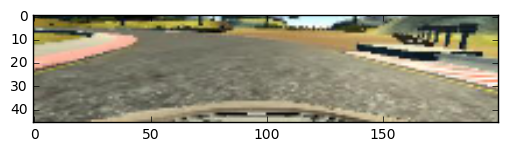

In [6]:
# put into a numpy array

%matplotlib inline

total_center_images = (center_images + center_images_flipped)
total_center_images = np.asarray(total_center_images)

plt.imshow(total_center_images[5])
len(total_center_images)

In [7]:
# import left images and resize and crop and flip vertically

left_images = []
left_images_flipped = []
left = dataframe.left.tolist()

lefty = [i.strip() for i in left]

for i in lefty:
    image = mpimg.imread('./data/' + i)
    image = cv2.resize(image, (200, 66))
    image = image[20:66, :200]
    left_images.append(image)

for i in lefty:
    image = mpimg.imread('./data/' + i)
    image = cv2.resize(image, (200, 66))
    image = image[20:66, :200]
    image = cv2.flip(image, 1)
    left_images_flipped.append(image)

16072

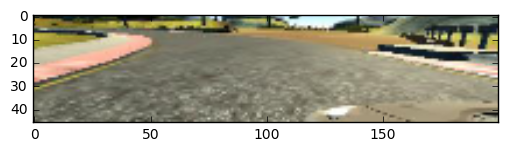

In [8]:
total_left_images = (left_images + left_images_flipped)
total_left_images = np.asarray(total_left_images)

plt.imshow(total_left_images[5])
len(total_left_images)

In [9]:
# import right images, resize and crop

right_images = []
right_images_flipped = []
right = dataframe.right.tolist()

righty = [i.strip() for i in right]

for i in righty:
    image = mpimg.imread('./data/' + i)
    image = cv2.resize(image, (200, 66))
    image = image[20:66, :200]
    right_images.append(image)

for i in righty:
    image = mpimg.imread('./data/' + i)
    image = cv2.resize(image, (200, 66))
    image = image[20:66, :200]
    image = cv2.flip(image, 1)
    right_images_flipped.append(image)

16072

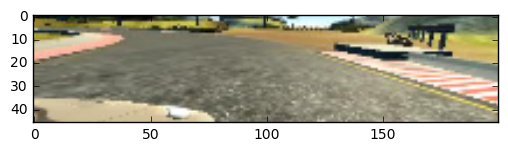

In [10]:
total_right_images = (right_images + right_images_flipped)
total_right_images = np.asarray(total_right_images)

plt.imshow(total_right_images[5])
len(total_right_images)

In [11]:
# add in steering values 

center_values = []
center_values_for_flipped = []

for i in dataframe['steering']:
    center_values.append(i)
for i in dataframe['steering']:
    center_values_for_flipped.append(i)

total_center_values = (center_values + center_values_for_flipped)
total_center_values = np.asarray(total_center_values)
len(total_center_values)
steering = dataframe.steering.tolist()

with open('./allimages.p', 'wb') as f:
    data = pickle.dump(center_images, left_images, right_images, f)
    labels = pickle.dump(center_values, f)


with open('./allimages.p', 'rb') as f:
    data = pickle.load(f)
    labels = pickle.load(f)

In [12]:
# split up data and shuffle

X_train, x_validation, y_train, y_validation = train_test_split(total_center_images, total_center_values, test_size = 0.2)

X_train, y_train = shuffle(X_train, y_train)

In [13]:
## Split up steering angle turns for center images

straight, left, right = [], [], []
steer_straight, steer_left, steer_right = [], [], []

index = 0
for i in steering:
    
    if i > 0.15:
        right.append(center_images[index])
        steer_right.append(i)
        index += 1
    elif i < -0.15:
        left.append(center_images[index])
        steer_left.append(i)
        index += 1
    else:
        straight.append(center_images[index])
        steer_straight.append(i)
        index +=1 
    
index = 0
for i in steering:
    
    if i > 0.15:
        right.append(center_images_flipped[index])
        steer_right.append(i)
        index += 1
    elif i < -0.15:
        left.append(center_images_flipped[index])
        steer_left.append(i)
        index += 1
    else:
        straight.append(center_images_flipped[index])
        steer_straight.append(i)
        index +=1         

In [14]:
print(len(straight), len(steer_straight))
print(len(right), len(steer_right))
print(len(left), len(steer_left))

13082 13082
1804 1804
1186 1186


In [15]:
# adjust steering angle values for left images

for i in range(len(left_images)):
    if steering[i] > 0.15:
        right.append(left_images[i])
        steer_right.append(steering[i] + 0.25)
        
for i in range(len(left_images_flipped)):
    if steering[i] > 0.15:
        right.append(left_images_flipped[i])
        steer_right.append(steering[i] + 0.25)
        
print(len(steer_right), len(right))

3608 3608


In [16]:
# adjust steering angle values for right images

for i in range(len(right_images)):
    if steering[i] < -0.15:
        left.append(right_images[i])
        steer_left.append(steering[i] + -0.25)

for i in range(len(right_images_flipped)):
    if steering[i] < -0.15:
        left.append(right_images_flipped[i])
        steer_left.append(steering[i] + -0.25)
print(len(steer_left), len(left))

2372 2372


In [17]:
len(left), len(steer_left), len(right), len(straight)

(2372, 2372, 3608, 13082)

In [21]:
# Evenly distribute straight images

new_straight = straight[:4001]
new_steer_straight = steer_straight[:4001]

In [22]:
# convert back to a single numpy array

X_train = np.float32(new_straight + left + right)
y_train = np.float32(new_steer_straight + steer_left + steer_right)

In [24]:
epochs = 5
batch_size = 128



In [26]:
kernal = [5, 5]
kernal2 = [3, 3]

model = Sequential()

model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(46, 200, 3)))

model.add(Convolution2D(24, kernal[0], kernal[1], subsample=(2,2), input_shape=(46, 200, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(36, kernal[0], kernal[1], subsample=(2,2)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(48, kernal[0], kernal[1], subsample=(2,2)))
model.add(Activation('relu'))

model.add(Convolution2D(64, kernal2[0], kernal2[1], subsample=(1,1)))
model.add(Activation('relu'))

#model.add(Convolution2D(64, kernal2[0], kernal2[1], subsample=(1,1)))
#model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('relu'))

model.add(Dense(1))

#optimizer, loss, accuracy
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
history = model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=epochs, verbose=2, validation_data=(x_validation, y_validation))

#evaluate the accuracy of the model
model.summary()



Train on 9981 samples, validate on 3215 samples
Epoch 1/5
148s - loss: 0.0692 - val_loss: 0.0137
Epoch 2/5
132s - loss: 0.0218 - val_loss: 0.0150
Epoch 3/5
147s - loss: 0.0172 - val_loss: 0.0176
Epoch 4/5
167s - loss: 0.0147 - val_loss: 0.0187
Epoch 5/5
163s - loss: 0.0138 - val_loss: 0.0204
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 46, 200, 3)    0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 21, 98, 24)    1824        lambda_2[0][0]                   
____________________________________________________________________________________________________
activation_5 (Activation)        (None, 21, 98, 24)    0           convolution2d_6[0][0]            


In [27]:
with open('./model.json', 'w') as outfile:
    json.dump(model.to_json(), outfile)

model.save_weights('model.h5')